# Data Science Final Exam

## Dear Students,<br><br>Welcome to your final exam in data science. Remember that the true essence of data science lies not only in obtaining results but in extracting meaningful insights.<br><br>In this examination we encourage you to focus not just on the output your code generates but on the story it tells. Sometimes, peculiar outcomes can act as beacons, signaling potential issues in your code or data. Rather than dismissing them, consider these anomalies as opportunities to refine your analysis and enhance your problem-solving skills.<br><br>As you progress through the tasks, think of your comments as a roadmap for others to follow your analytical journey. Clearly articulate your intentions before executing code, detail the steps you took, and, most importantly, provide a comprehensive interpretation of your results. A well-documented analysis not only showcases your technical proficiency but also your ability to think critically about the data at hand.<br><br>Remember, data science is not merely about crunching numbers; it's about crafting narratives that guide decision-making. Each line of code you write and every graph you create contributes to a broader story. Make sure your commentary reflects this understanding, and don't hesitate to acknowledge any challenges or uncertainties you encounter along the way.<br><br>Best of luck!

## Task 1. Hypothesis Testing (2 points)


**The data for this task is in `task_1.csv`**

#### Data task_1.csv:
* index - enumeration
* women_1 - weights of women observed (1st group)
* women_2 - weights of women observed (2nd group)
* men - weights of men observed

### 1.1 Check normality assumption for women_1 and women_2. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df1 = pd.read_csv('task_1.csv')
df1.head()

,index,women_1,women_2,men
0,0,73.098928,78.0,88.274204
1,1,73.613758,65.0,85.956865
2,2,56.480751,65.0,66.678725
3,3,81.904591,91.0,69.819411
4,4,67.361169,104.0,75.928297


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    1000 non-null   int64  
 1   women_1  1000 non-null   float64
 2   women_2  1000 non-null   float64
 3   men      1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [3]:
df1.describe()

,index,women_1,women_2,men
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,65.287752,65.364000,79.505936
std,288.819436,9.737283,29.542855,9.787344
min,0.000000,36.569431,0.000000,46.968109
25%,249.750000,58.730519,39.000000,72.730460
50%,499.500000,65.524522,65.000000,79.359862
75%,749.250000,71.891162,91.000000,86.169814
max,999.000000,98.719613,169.000000,113.757703


In [4]:
def check_normality(df_column):
    N = len(df_column)
    
    # Finding the mean and variance of the dataset
    mu = df_column.mean()
    sigma = 0
    for i in range(N):
        sigma += (df_column.iloc[i] - mu)**2
    sigma /=(N-1)
    sigma = sigma**(0.5)
    print(f"μ = {mu}, σ = {sigma}")
    
    # Finding the number of observation which lie in say (mu - sigma) to (mu + sigma) region.
    """for normal distribution:
            Pr(μ−σ≤X≤μ+σ)=0.6827
            Pr(μ−2σ≤X≤μ+2σ)=0.9545
    """
    count1 = 0
    count2 = 0
    for i in range(N):
        if(df_column.iloc[i] <= mu+sigma and df_column.iloc[i] >= mu-sigma):
            count1 +=1
        if(df_column.iloc[i] <= mu+2*sigma and df_column.iloc[i] >= mu-2*sigma):
            count2 +=1
    prob1 = count1/N
    prob2 = count2/N
    print(f"Pr(μ−σ≤X≤μ+σ) = {prob1} & Pr(μ−2σ≤X≤μ+2σ) = {prob2}\n")

    
check_normality(df1['women_1'])
check_normality(df1['women_2'])
check_normality(df1['men'])

μ = 65.28775186707378, σ = 9.737282997996855
Pr(μ−σ≤X≤μ+σ) = 0.662 & Pr(μ−2σ≤X≤μ+2σ) = 0.958

μ = 65.364, σ = 29.542855046259195
Pr(μ−σ≤X≤μ+σ) = 0.733 & Pr(μ−2σ≤X≤μ+2σ) = 0.954

μ = 79.50593565741835, σ = 9.787344379171122
Pr(μ−σ≤X≤μ+σ) = 0.679 & Pr(μ−2σ≤X≤μ+2σ) = 0.96



Since the **probabilities are in relation with the probabilities associated with the normal distribution** which is as follows,
            Pr(μ−σ≤X≤μ+σ)=0.6827
            Pr(μ−2σ≤X≤μ+2σ)=0.9545
we say that the data satisfies the normality assumption
            

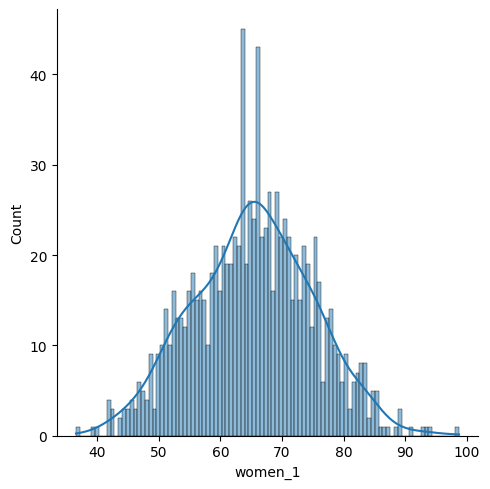

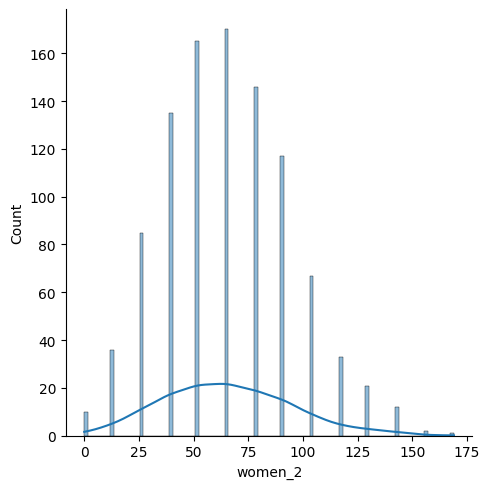

In [5]:
sns.displot(df1['women_1'], bins=100, kde=True)
sns.displot(df1['women_2'], bins=100, kde=True)

**The above histograms also show that the data can be approximated as Normal distribution.**


### 1.2 Check one of the following hypotheses (based on where the normality assumption is met) using t-test with appropriate paramenters:

**1.**
* HO - women_1 have bigger weight than men
* H1 - they are not

**2.**
* HO - women_2 have the same weight as men
* H1 - they are not

## Task 2. ANOVA (2 points)

Calcium is an essential mineral that regulates the heart, is important for blood clotting and for building healthy bones. The National Osteoporosis Foundation recommends a daily calcium intake of 1000-1200 mg/day for adult men and women. While calcium is contained in some foods, most adults do not get enough calcium in their diets and take supplements. Unfortunately some of the supplements have side effects such as gastric distress, making them difficult for some patients to take on a regular basis.  

 A study is designed to test whether there is a difference in mean daily calcium intake in adults with normal bone density, adults with osteopenia (a low bone density which may lead to osteoporosis) and adults with osteoporosis. Adults 60 years of age with normal bone density, osteopenia and osteoporosis are selected at random from hospital records and invited to participate in the study. Each participant's daily calcium intake is measured based on reported food intake and supplements. The data are shown below. 

Key steps to follow:

* Checking assumptions for ANOVA
* Performing Anova
* Interpret the results (in markdown or as a comment)

In [6]:
anova_raw = {
    'Normal Bone Density': [1200, 1000, 980, 900, 750, 800],
    'Osteopenia': [1000, 1100, 700, 800, 500, 700],
    'Osteoporosis': [890, 650, 1100, 900, 400, 350]
}

### 2.1 Check assumptions for normality using Shapiro-Wilk test

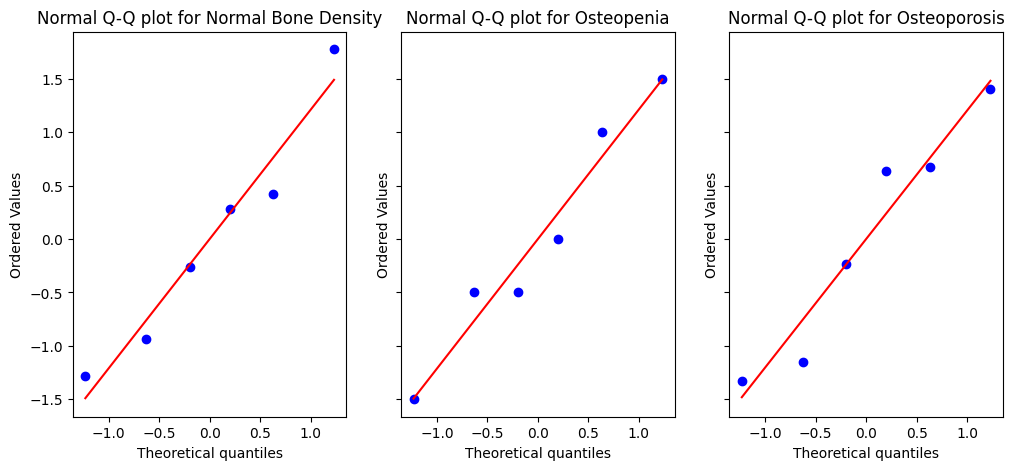

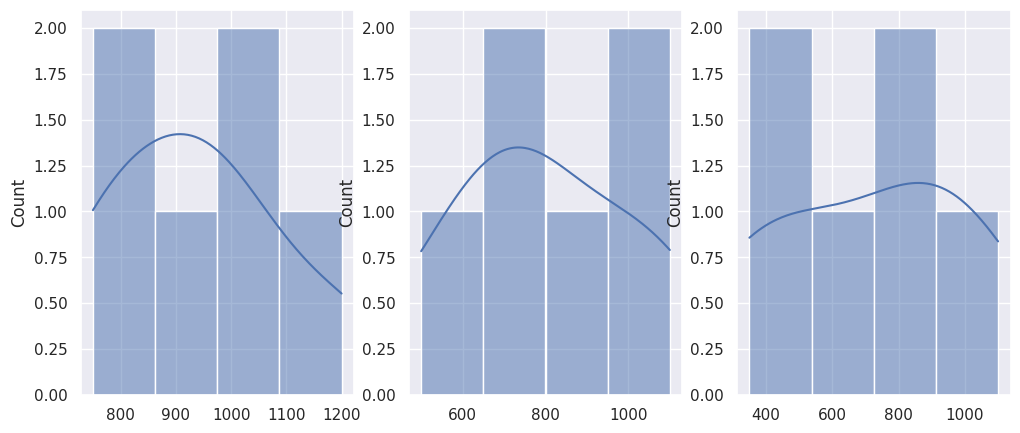

ShapiroResult(statistic=0.9554205536842346, pvalue=0.7838440537452698)
ShapiroResult(statistic=0.9552927613258362, pvalue=0.7828279137611389)
ShapiroResult(statistic=0.921475887298584, pvalue=0.5160539150238037)


In [7]:
# Applying the Q-Q Test on the given data wrt to Normal Distribution:
def QQtest(df_columns):
    fig, axs = plt.subplots(1, len(df_columns), sharey=True, figsize=(12,5))
    for idx, (keys, col) in enumerate(df_columns.items()):
        z = (col-np.mean(col))/np.std(col) 
        stats.probplot(z, dist="norm", plot=axs[idx]) 
        axs[idx].title.set_text(f"Normal Q-Q plot for {keys}") 
    plt.show() 
QQtest(anova_raw)

sns.set()
fig, axes = plt.subplots(1, 3, figsize=(12,5))
sns.histplot(anova_raw['Normal Bone Density'], kde=True, ax=axes[0])
sns.histplot(anova_raw['Osteopenia'], kde=True, ax=axes[1])
sns.histplot(anova_raw['Osteoporosis'], kde=True, ax=axes[2])
plt.show()

from scipy.stats import shapiro
print(shapiro(anova_raw['Normal Bone Density']))
print(shapiro(anova_raw['Osteopenia']))
print(shapiro(anova_raw['Osteoporosis']))

# P-value for all the three is >0.05 hence the null hypothesis that data follows normal distribution is Accepted.

### 2.2 Сheck the assumption of homogeneity of variances

### 2.3 Perform ANOVA and interpret the results

## Task 3. Linear Regression

Given the Dataset in `task_3.csv` make some necessary transformations and train regression model to predict flight tickets' price.

### Dataset Description

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

**Dataset**
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**Features**

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

*Dataset is already cleaned*


### 3.1 Data Transformation:

- Transform categorical variables to numeric form. Decide on the most appropriate method, such as one-hot encoding, label encoding, or any other relevant technique.
- Provide justifications for the chosen transformation method and discuss any variables that might be excluded.

In [8]:
dfr = pd.read_csv('task_3.csv')
print(dfr.head())
print(dfr.info())

   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------       

In [9]:
dfr = dfr.drop(columns=['index'])
print(dfr.airline.unique())
print(dfr.flight.unique())
print(dfr.source_city.unique())
print(dfr.departure_time.unique())
print(dfr.stops.unique())
print(dfr.arrival_time.unique())
print(dfr.destination_city.unique())
print(dfr['class'].unique())
print(dfr.days_left.unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


In [10]:
flights_by_airline = dfr.groupby('source_city')['flight'].apply(list)
print(flights_by_airline)

source_city
Bangalore    [I5-996, UK-820, UK-802, 6E-6139, 6E-2514, 6E-...
Chennai      [6E-2752, 6E-613, AI-539, SG-612, SG-612, SG-6...
Delhi        [SG-8709, SG-8157, I5-764, UK-995, UK-963, UK-...
Hyderabad    [I5-1543, I5-1543, UK-880, I5-1517, SG-3283, 6...
Kolkata      [SG-8264, I5-582, I5-2473, I5-1563, 6E-2009, G...
Mumbai       [UK-994, UK-910, G8-339, 6E-6004, 6E-2077, AI-...
Name: flight, dtype: object


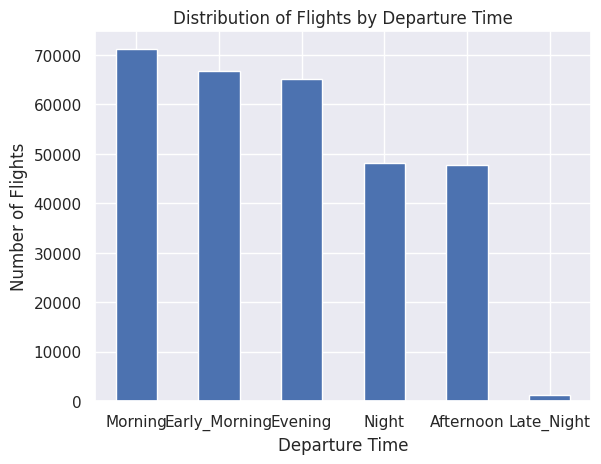

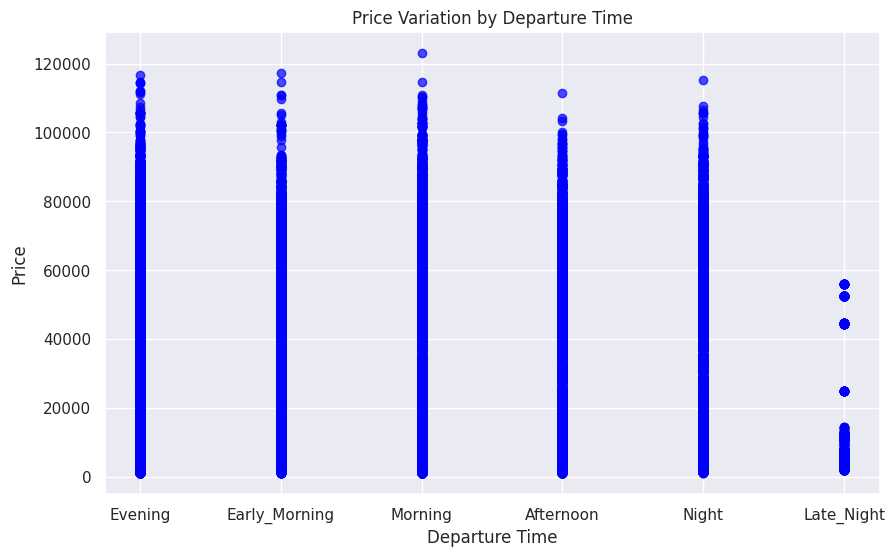

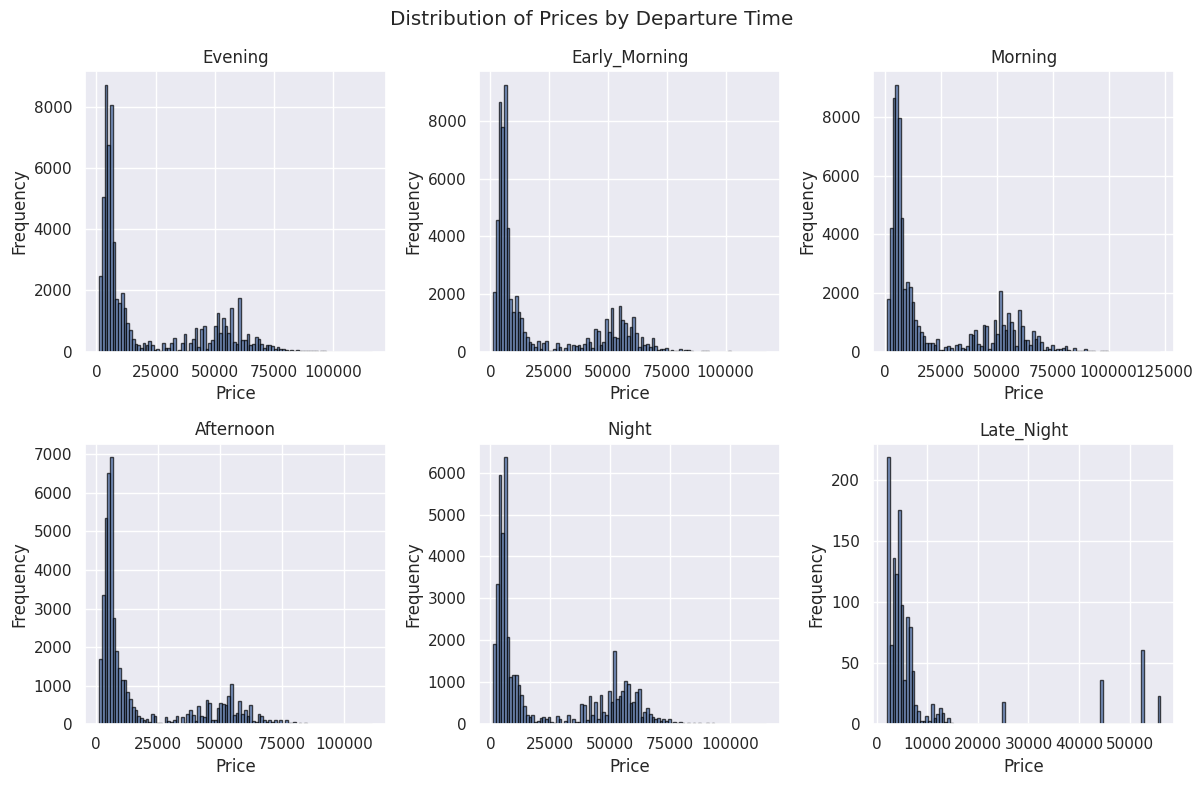

In [11]:
# How flights are distributed wrt the time ?

departure_time_counts = dfr['departure_time'].value_counts()
departure_time_counts.plot(kind='bar')
plt.title('Distribution of Flights by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()
# --> Seems like the distribution is kind positively skewed.

# How does the prices vary wrt the time ?
plt.figure(figsize=(10, 6))
plt.scatter(dfr['departure_time'], dfr['price'], color='blue', alpha=0.7)
plt.title('Price Variation by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
# --> all the prices are very well distributed except that of 'Late Night' hence Late night prices are cheaper, we might need to see the source and destinations/ flight operating Late night but overall it's true.

# What is the distribution of prices for a particular time?
departure_times = ['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night']
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, departure_time in enumerate(departure_times):
    row = i // n_cols
    col = i % n_cols
    df_filtered = dfr[dfr['departure_time'] == departure_time]

    axes[row, col].hist(df_filtered['price'], bins=100, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(departure_time)
    axes[row, col].set_xlabel('Price')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)
fig.suptitle('Distribution of Prices by Departure Time')
plt.tight_layout()
plt.show()

# --> This shows that there are approximately 2 different Normal distibutions into play, which is quiet obvious since there are 2 classes, (economy and business). 
#     This leads to one normal distribution near cheap prices and other near relatively higher prices.

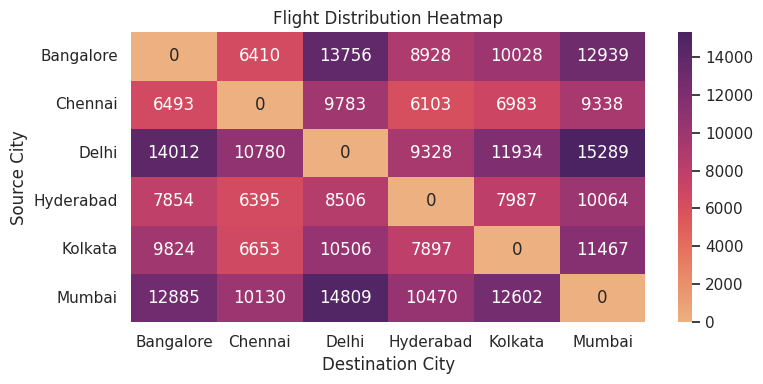

In [12]:
# Count flights for each source and destination city combination
flight_counts = dfr.groupby(['source_city', 'destination_city']).size().reset_index(name='flight_count')

# Pivot the DataFrame for heatmap plotting
flight_counts_pivot = flight_counts.pivot_table(index='source_city', columns='destination_city', values='flight_count', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(flight_counts_pivot, annot=True, cmap='flare', fmt='g')

plt.title('Flight Distribution Heatmap')
plt.xlabel('Destination City')
plt.ylabel('Source City')

plt.tight_layout()
plt.show()

# Tried to visualize the busiest city, and Delhi turned out to be the busiest airport (capital indeed)

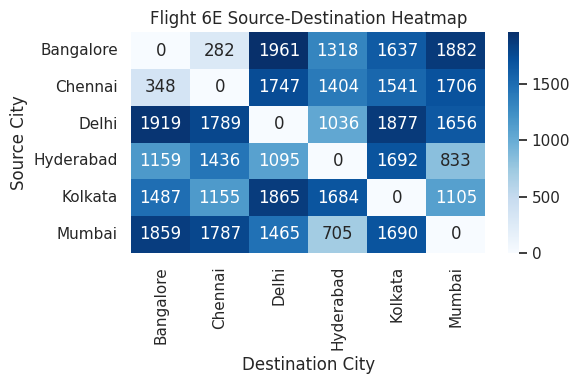

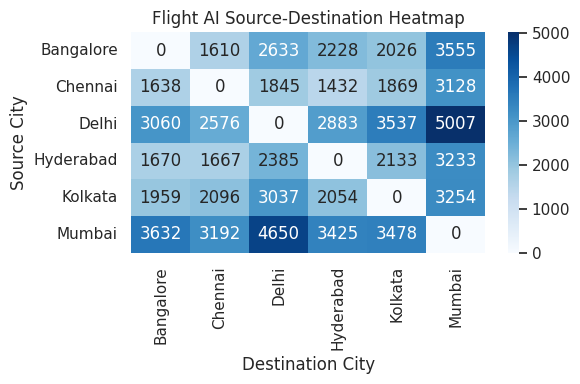

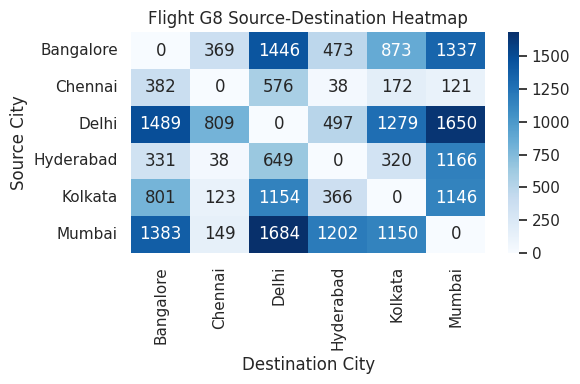

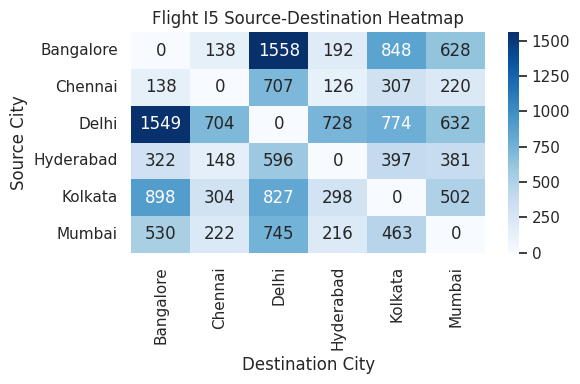

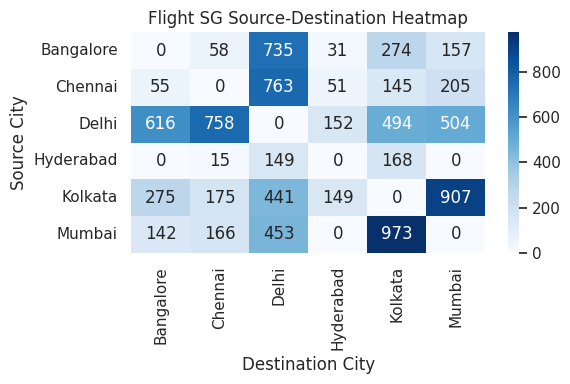

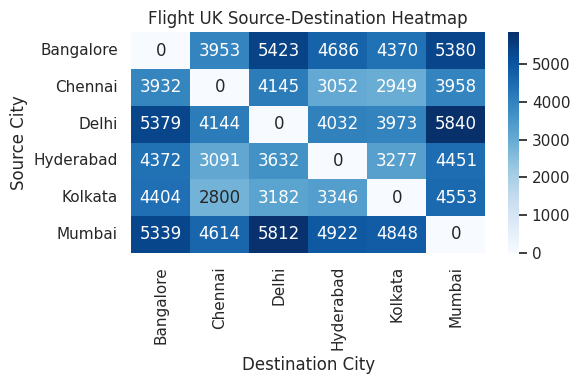

airline 6E, UK typically operate b/w all airports but 
 
        airline G8 mainly tavels between Delhi-Bombay or Delhi-Banglore 
 
        airline I5 mainly tavels between Delhi-Banglore 

        airline SG mainly tavels between Kolkata-Bombay


In [13]:
df = dfr.copy()

# Extract initial two letters of flight
df['flight_prefix'] = df['flight'].apply(lambda x: x[:2])

# Group by flight_prefix and create heatmap for each group
for flight_prefix, flight_group in df.groupby('flight_prefix'):
    # Create a DataFrame with the counts of source and destination cities for the current flight prefix
    flight_counts = flight_group.groupby(['source_city', 'destination_city']).size().reset_index(name='count')

    # Pivot the DataFrame for heatmap plotting
    flight_pivot = flight_counts.pivot_table(index='source_city', columns='destination_city', values='count', fill_value=0)

    # Plotting heatmap for the current flight prefix
    plt.figure(figsize=(6, 4))
    sns.heatmap(flight_pivot, annot=True, cmap='Blues', fmt='g')

    plt.title(f'Flight {flight_prefix} Source-Destination Heatmap')
    plt.xlabel('Destination City')
    plt.ylabel('Source City')

    plt.tight_layout()
    plt.show()


# This gives insights over which flight is operating b/w which airports generally.
print(f"""airline {'6E'}, {'UK'} typically operate b/w all airports but \n 
        airline {'G8'} mainly tavels between Delhi-Bombay or Delhi-Banglore \n 
        airline {'I5'} mainly tavels between Delhi-Banglore \n
        airline {'SG'} mainly tavels between Kolkata-Bombay"""
        )

airline
AirAsia      [I5-764, I5-747, I5-747, I5-744, I5-784, I5-76...
Air_India    [AI-887, AI-665, AI-441, AI-453, AI-504, AI-50...
GO_FIRST     [G8-334, G8-336, G8-392, G8-338, G8-266, G8-10...
Indigo       [6E-5001, 6E-6202, 6E-549, 6E-6278, 6E-5328, 6...
SpiceJet     [SG-8709, SG-8157, SG-8169, SG-2976, SG-2976, ...
Vistara      [UK-995, UK-963, UK-945, UK-927, UK-951, UK-93...
Name: flight, dtype: object


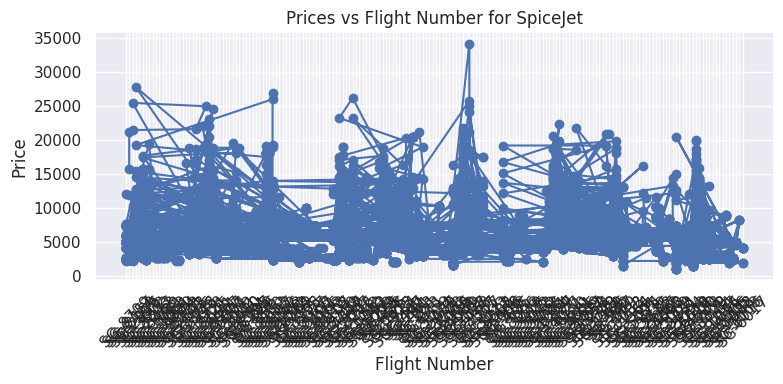

In [14]:
flights_by_airline = dfr.groupby('airline')['flight'].apply(list)
print(flights_by_airline)

# The airline column is redudant since we can map the airline with the flight using the first 2 instances of flight.
airline_to_initials = {'AirAsia': 'I5', 'Air_India': 'AI', 'GO_FIRST': 'G8', 'Indigo': '6E', 'SpiceJet': 'SG', 'Vistara': 'UK'}
# and since It does'nt matter which flight number, only the provider is necessary, we can see it by finding plotting price for a particular provider wrt its flight numbers
airline_of_interest = 'SpiceJet'
df_airline = dfr[dfr['airline'] == airline_of_interest]

# Plot prices wrt flight number
plt.figure(figsize=(8, 4))
plt.plot(df_airline['flight'], df_airline['price'], marker='o', linestyle='-')

plt.title(f'Prices vs Flight Number for {airline_of_interest}')
plt.xlabel('Flight Number')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(True)
plt.tight_layout()
plt.show()

# The plot shows a random behaviour hence we can drop the flight column and retain the airline column.
# Hence we can now drop the airline column from dataframe.
dfr = dfr.drop(columns=['flight'])

In [15]:
# We can encode 'economy' as 0 and 'business' as 1;
dfr['class'] = dfr['class'].replace({'Economy': 0, 'Business': 1})
# We can encode 'stops' as 2, 1, 0 for zero, one and more than 2 stops, -> increase in stops tend to have a decrese in prices
dfr['stops'] = dfr['stops'].replace({'zero': 2, 'one': 1, 'two_or_more':0})

"""Creating one-hot encoding for the source_cities and destination_cities will lead to an increase in # of feature, hence let's use target encoding:
"""
# Calculate the mean price for each source_city and destination_city
source_city_mean_prices = dfr.groupby('source_city')['price'].mean()
destination_city_mean_prices = dfr.groupby('destination_city')['price'].mean()

# Map the mean prices back to the original DataFrame
dfr['source_city_mean_price'] = dfr['source_city'].map(source_city_mean_prices)
dfr['destination_city_mean_price'] = dfr['destination_city'].map(destination_city_mean_prices)

dfr = dfr.drop(columns=['source_city'])
dfr = dfr.drop(columns=['destination_city'])

""" Now we can create one-hot encoding for the airline and the arrival and departure times.
    NOTE!! the notion of arrival time is redudant given departure time and duration.
    Hence we can drop arrival_time and encode everything else.
"""
dfr = dfr.drop(columns=['arrival_time'])
dfr = pd.get_dummies(dfr, columns=['airline', 'departure_time'])

In [16]:
dfr.head()

,stops,class,duration,days_left,price,source_city_mean_price,destination_city_mean_price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,2,0,2.17,1,5953,18951.326639,21372.529469,False,False,False,False,True,False,False,False,True,False,False,False
1,2,0,2.33,1,5953,18951.326639,21372.529469,False,False,False,False,True,False,False,True,False,False,False,False
2,2,0,2.17,1,5956,18951.326639,21372.529469,True,False,False,False,False,False,False,True,False,False,False,False
3,2,0,2.25,1,5955,18951.326639,21372.529469,False,False,False,False,False,True,False,False,False,False,True,False
4,2,0,2.33,1,5955,18951.326639,21372.529469,False,False,False,False,False,True,False,False,False,False,True,False


### 3.2 Visualization of Variables:

- Visualize the correlation between variables. Use techniques like correlation matrices or heatmap to represent relationships between different features.
- Discuss any interesting observations or patterns identified during visualization.

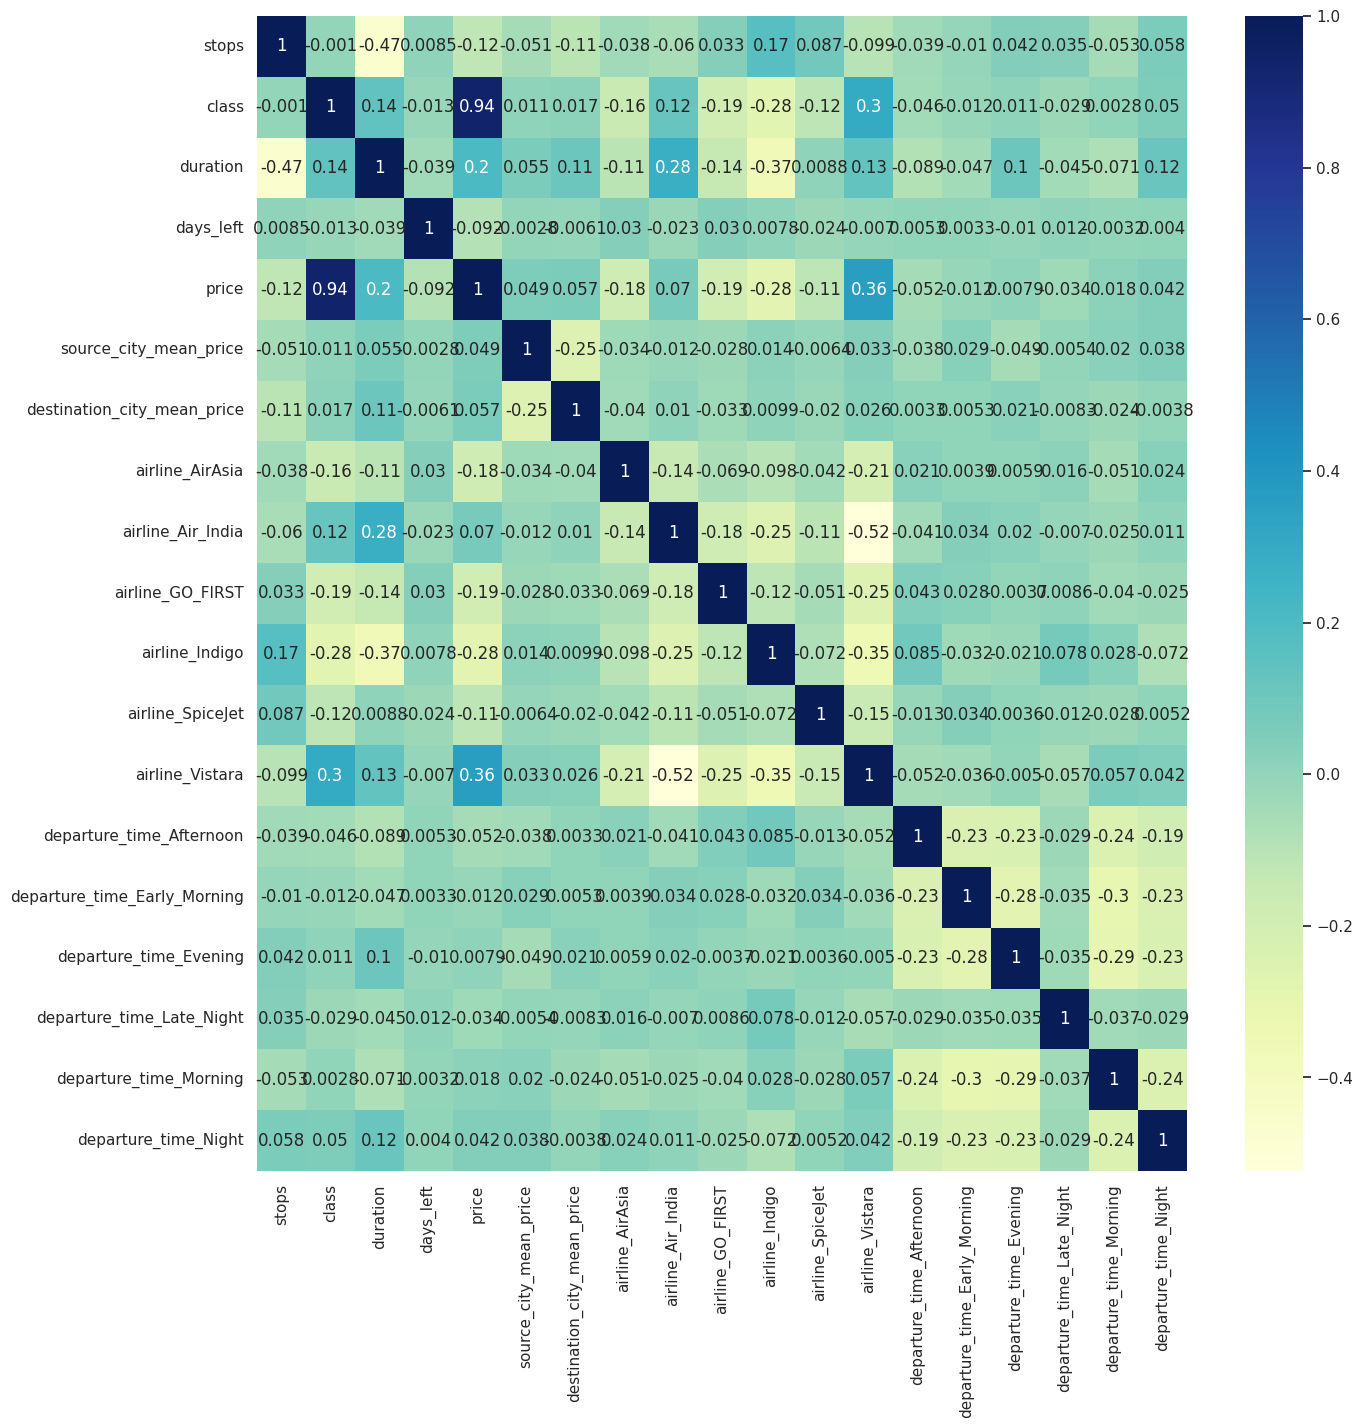

In [17]:
# A few of the observations are done above before encoding the stuff.
plt.figure(figsize=(15, 15))
dataplot = sns.heatmap(dfr.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Conclusions drawn from the above corelation matrix**
- Price - class(economy/business) are highy coorelated
- Price - duration / (whether flight is Vistara) are +vely corelated.
- A few flights/duration and departure time seems to be a little bit -vely coorelated. 


### 3.3 Optional Graphs:

- Create additional graphs that you find helpful and insightful for understanding the dataset.
- Examples of optional graphs include distribution plots, box plots, or any other visualization that might provide useful insights. 

In [18]:
# Done above the encoding!! for better representations

### 3.4 Linear Regression:
- Perform linear regression to predict ticket prices based on relevant independent variables. Choose variables that are likely to influence the ticket price.
- Evaluate the results using R squared (coefficient of determination) to assess the goodness of fit of the regression model.
- Provide interpretation of the coefficients and discuss the overall performance of the model.

In [19]:
def viz_predictions(X_test, y_test, y_pred):
    # Select a few features to plot against the price
    features_to_plot = ['duration', 'days_left', 'source_city_mean_price']
    
    # Iterate over selected features
    for feature in features_to_plot:
        plt.figure(figsize=(5, 3))
        
        # Plot true prices from the test set
        plt.scatter(X_test[feature], y_test, color='green', label='True Price')
        
        # Plot predicted prices from the test set
        plt.scatter(X_test[feature], y_pred, color='red', label='Predicted Price')
        
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(f'Price vs {feature}')
        plt.legend()
        plt.grid(True)
        plt.show()

Root Mean Squared Error: 6884.386675458147


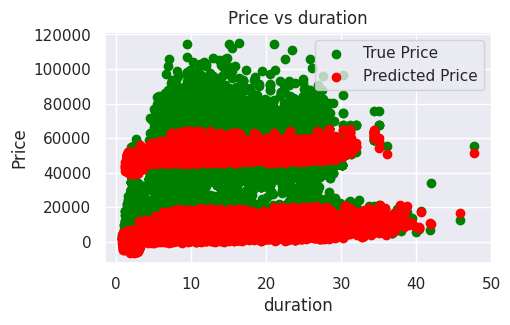

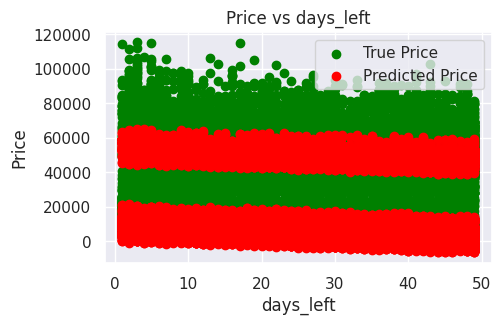

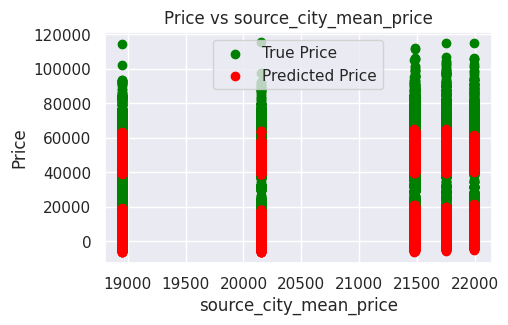

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = dfr.drop(columns=['price'])
y = dfr['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", mse**0.5)

viz_predictions(X_test, y_test, y_pred)

Root Mean Squared Error: 3532.039562691695


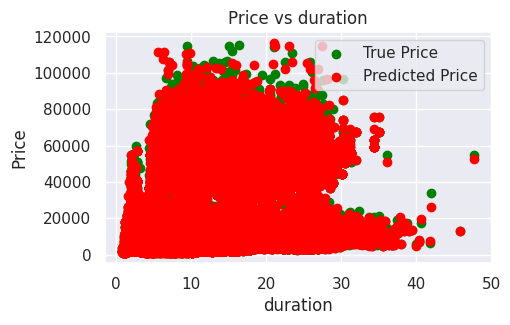

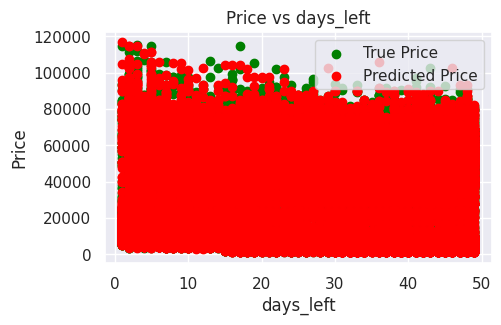

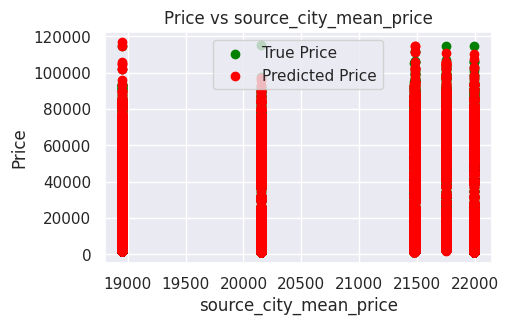

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", mse**0.5)

viz_predictions(X_test, y_test, y_pred)

**Decision Tree Regressor Acheives greater accuracies...**

## Task 4. Classification (3 points)

Given the Dataset in `task_4.csv` make some necessary transformations and train the model to classify the obesity type.

### Dataset Description

The data contains 17 attributes and 2111 records, the records are labeled with the **class variable NObesity (Obesity Level), that allows classification of the data** using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight.

**Questions of the survey used for initial recollection of information**

Question (Possible Answers)

* What is your gender?	•Female •Male
* What is your age?	Numeric value
* What is your height?	Numeric value in meters
* What is your weight?	Numeric value in kilograms
* Has a family member suffered or suffers from overweight?	•Yes •No
* Do you eat high caloric food frequently? •Yes •No
* Do you usually eat vegetables in your meals?	•Never •Sometimes •Always
* How many main meals do you have daily?	•Between 1 y 2 •Three •More than three
* Do you eat any food between meals? •No •Sometimes •Frequently •Always
* Do you smoke? •Yes •No
* How much water do you drink daily? •Less than a liter •Between 1 and 2 L •More than 2 L
* Do you monitor the calories you eat daily? •Yes •No
* How often do you have physical activity? •I do not have •1 or 2 days •2 or 4 days •4 or 5 days
* How much time do you use technological devices such as cell phone, videogames, television, computer and others? •0–2 hours •3–5 hours •More than 5 hours
* How often do you drink alcohol? •I do not drink •Sometimes •Frequently •Always
* Which transportation do you usually use? •Automobile •Motorbike •Bike •Public Transportation •Walking


### 4.1 Data Preparation:

- Identify and handle missing values, outliers, or any other data quality issues.
- Convert categorical variables into a suitable format for modeling.
- Discuss any decisions made during the data cleaning process.

In [22]:
dfc = pd.read_csv('task_4.csv')
dfc.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
dfc.info() # --> All non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [24]:
for col in dfc.columns:
    if(col == 'NObeyesdad' or col == 'MTRANS' or col == 'CALC' or col == 'SCC' or col == 'SMOKE' or col == 'CAEC' or col == 'FAVC' or col =='family_history_with_overweight'):
        print(f"Column '{col}': {dfc[col].unique()}")

Column 'family_history_with_overweight': ['yes' 'no']
Column 'FAVC': ['no' 'yes']
Column 'CAEC': ['Sometimes' 'Frequently' 'Always' 'no']
Column 'SMOKE': ['no' 'yes']
Column 'SCC': ['no' 'yes']
Column 'CALC': ['no' 'Sometimes' 'Frequently' 'Always']
Column 'MTRANS': ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Column 'NObeyesdad': ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [25]:
# Encode females as 0 and males as 1, 'no'-> 0 and 'yes'->1 everywhere.
dfc['Gender'] = dfc['Gender'].replace({'Female': 0, 'Male': 1})
dfc['family_history_with_overweight'] = dfc['family_history_with_overweight'].replace({'no': 0, 'yes': 1})
dfc['FAVC'] = dfc['FAVC'].replace({'no': 0, 'yes': 1})
dfc['SMOKE'] = dfc['SMOKE'].replace({'no': 0, 'yes': 1})
dfc['SCC'] = dfc['SCC'].replace({'no': 0, 'yes': 1})

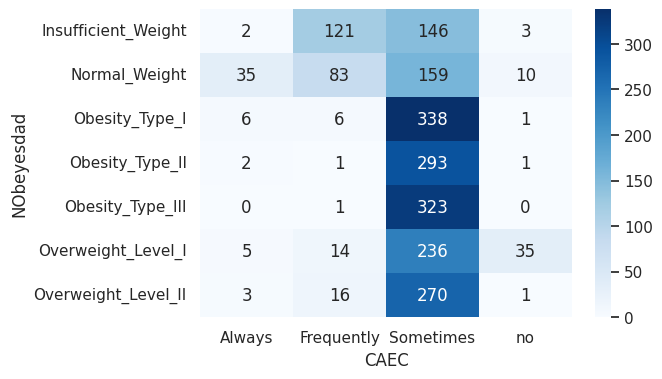

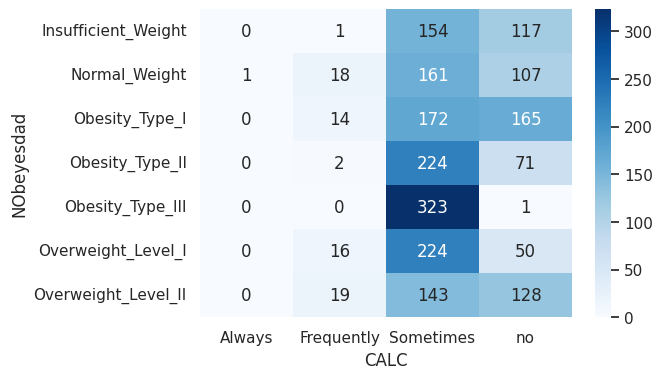

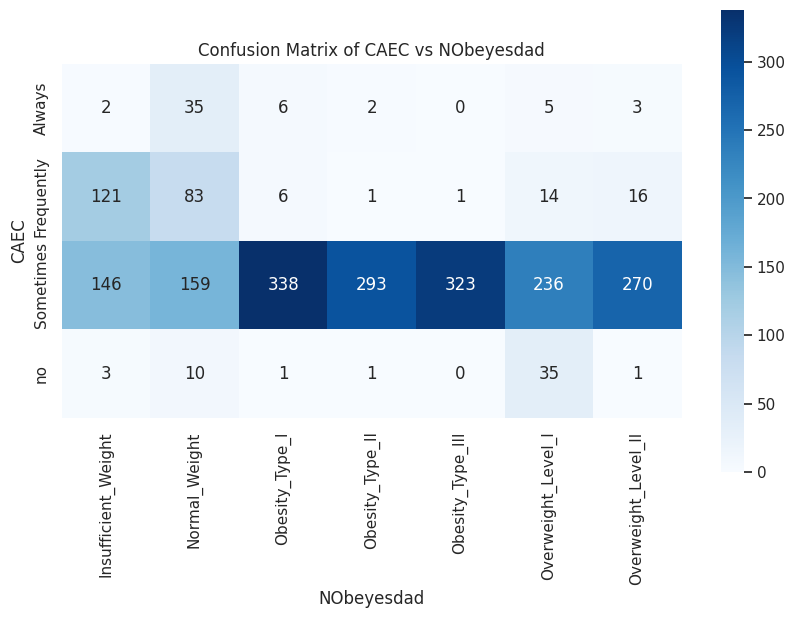

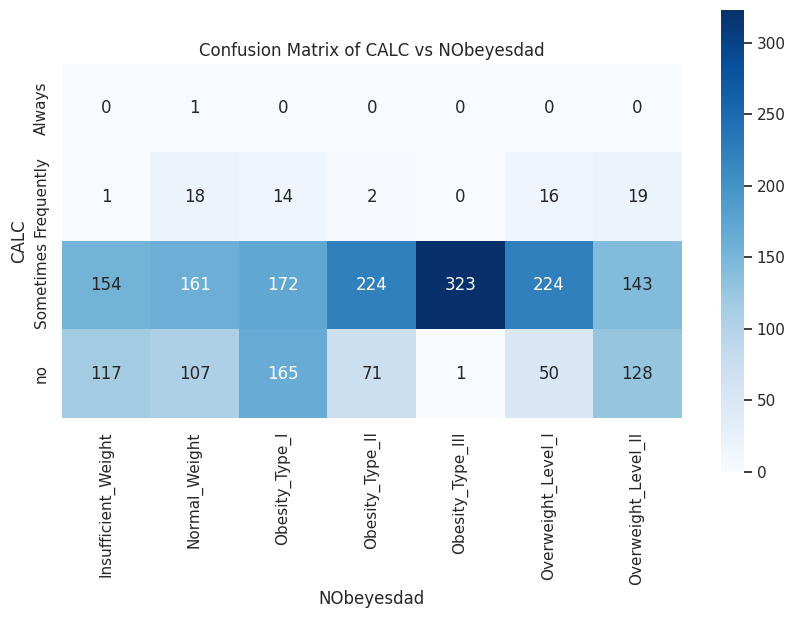

In [26]:
# Now looking how 'Sometimes', 'Frequently' affect the result and can they be considered same as no or yes?
def heat_map_between(col1, col2, df):
    df_cnt = df.groupby([col1, col2]).size().reset_index(name='count')
    
    # Pivot the DataFrame for heatmap plotting
    df_pivot = df_cnt.pivot_table(index=col1, columns=col2, values='count', fill_value=0)
    # Plotting heatmap for the current flight prefix
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_pivot, annot=True, cmap='Blues', fmt='g')

heat_map_between('NObeyesdad','CAEC',dfc)
heat_map_between('NObeyesdad','CALC',dfc)

# --> Always and frequently can be mapped to one single number but 'sometimes' and 'no' can't....
# --> this might be due to some bias cause some people will refrain from saying frequently and 'no' directly and 'sometimes' feels like a better choice.
# --> considering this bias I am assuming that 'Sometimes', 'no' should be mapped to one single int.

dfc['CAEC'] = dfc['CAEC'].replace({'no': 0, 'Sometimes': 0, 'Frequently': 1, 'Always':1})
dfc['CALC'] = dfc['CALC'].replace({'no': 0, 'Sometimes': 0, 'Frequently': 1, 'Always':1})

In [57]:
dfc.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,0,no,2.0,no,0.0,1.0,0,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,0,yes,3.0,yes,3.0,0.0,0,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,0,no,2.0,no,2.0,1.0,1,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,0,no,2.0,no,2.0,0.0,1,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,0,no,2.0,no,0.0,0.0,0,Public_Transportation,Overweight_Level_II


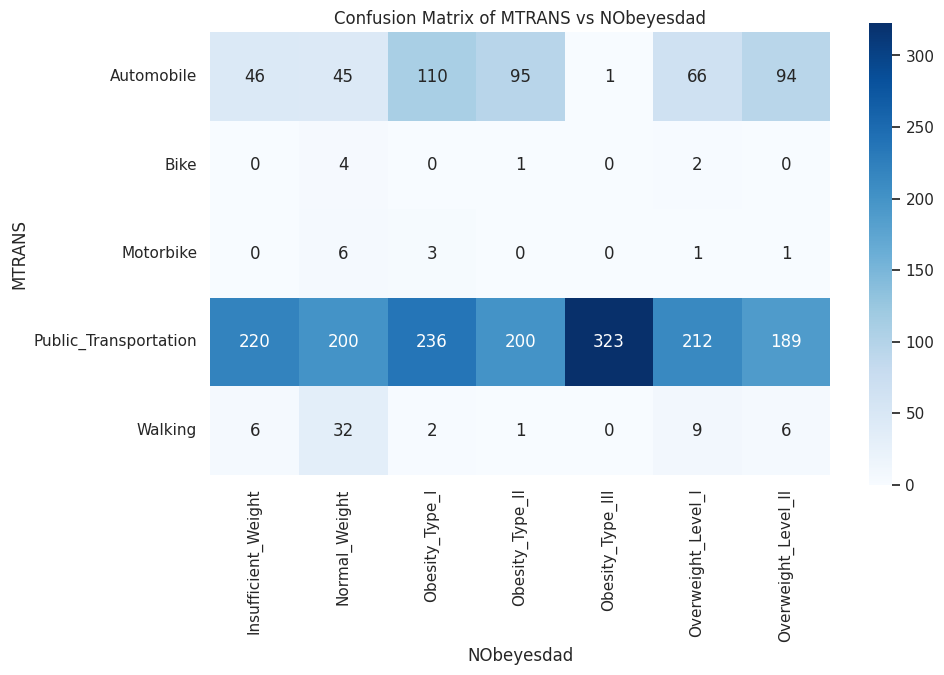

In [29]:
from sklearn.metrics import confusion_matrix
def plot_heatmap(df, col1, col2):
    confusion_mat = pd.crosstab(df[col1], df[col2])
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
    plt.title(f'Heatmap of {col1} vs {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()
plot_heatmap(dfc, 'MTRANS', 'NObeyesdad')
# The mode of Transportation generally defines wealts (my personal bias), but since 'Bike' and 'Motorbike' tend to have about 0 to no coorelation,
# We can include it in a same class.

# Whereas 'Public_transport' have a huge cooreation with the 'NObeyesdad' for each category, so I will make three classes for it 'Walking', 'Public Transport', 'Bike==Motorbike', 'Automobile'

# Thinking Process -->
# Although the data seems to be biased for people using public Transport, I might as well drop the 'Bike', 'Motorbike' and 'Walking' and create a one hot encoding for wheather Public transport or not.

# Conclusion:
dfc['MTRANS'] = dfc['MTRANS'].replace({'Automobile': 0, 'Bike': 0, 'Motorbike': 0, 'Public_Transportation':1, 'Walking':0})


In [33]:
dfc.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,1,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,0,1,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,1,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,0,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,0,1,Overweight_Level_II


In [41]:
# Analysing the effect of Age, Height, Weight, and Gender...
average_stats = dfc.groupby('NObeyesdad').agg({'Age': 'mean', 'Height': 'mean', 'Weight': 'mean'})
print(average_stats)
print(dfc.describe()) # Shows that the data is skewed towards people of age between 20 - 30 hence the avg_stats show relatively similar avegrages for age.

# Although the heights and Weights are very well distributed (observing from quantiles), hence a conclusion can be made..

# --> Avegrage weight for :
#Obesity_Type_I   92.870198
#Obesity_Type_II  115.305311
#Obesity_Type_III 120.941114

# and average Height of people with Obesity ~ 1.68 - 1.70 m.

                           Age    Height      Weight
NObeyesdad                                          
Insufficient_Weight  19.783237  1.691117   49.906330
Normal_Weight        21.738676  1.676585   62.155052
Obesity_Type_I       25.884941  1.693804   92.870198
Obesity_Type_II      28.233785  1.771795  115.305311
Obesity_Type_III     23.495554  1.687559  120.941114
Overweight_Level_I   23.417674  1.687836   74.266828
Overweight_Level_II  26.996981  1.703748   82.085271
            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.947192     1.630000    65.473343   
50%       1.000000    22.777890     1.700499    83.000000   
75%       1.000000    26.000000     1.768464   107.430682   
max       1.000000    61.000000    

In [46]:
gender_proportion = dfc.groupby(['NObeyesdad', 'Gender']).size() / dfc.groupby('NObeyesdad').size()
# print(gender_proportion)
# Obesity_Type_II & Obesity_Type_III Catch the eye cause a relatively high proportion of men and women respectively...

# We can also observe the respective average BMI as well::

dfc['BMI'] = dfc['Weight'] / (dfc['Height'] ** 2)
gender_proportion = dfc.groupby(['NObeyesdad', 'Gender']).size() / dfc.groupby('NObeyesdad').size()
average_bmi = dfc.groupby(['NObeyesdad', 'Gender'])['BMI'].mean()
print("Proportion of males and females for each class of 'NObeyesdad':")
print(gender_proportion)
print("\nAverage BMI corresponding to the proportion:")
print(average_bmi)

Proportion of males and females for each class of 'NObeyesdad':
NObeyesdad           Gender
Insufficient_Weight  0         0.636029
                     1         0.363971
Normal_Weight        0         0.491289
                     1         0.508711
Obesity_Type_I       0         0.444444
                     1         0.555556
Obesity_Type_II      0         0.006734
                     1         0.993266
Obesity_Type_III     0         0.996914
                     1         0.003086
Overweight_Level_I   0         0.500000
                     1         0.500000
Overweight_Level_II  0         0.355172
                     1         0.644828
dtype: float64

Average BMI corresponding to the proportion:
NObeyesdad           Gender
Insufficient_Weight  0         17.348876
                     1         17.501003
Normal_Weight        0         21.782369
                     1         22.237987
Obesity_Type_I       0         31.858039
                     1         32.573715
Obesity_Type_

In [48]:
# Encorporating the BMI index insted of parameters like Height, Weight
dfc = dfc.drop(columns='Height')
dfc = dfc.drop(columns='Weight')

In [49]:
dfc.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,1,Normal_Weight,24.386526
1,0,21.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,0,1,Normal_Weight,24.238227
2,1,23.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,1,Normal_Weight,23.765432
3,1,27.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,0,Overweight_Level_I,26.851852
4,1,22.0,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,0,1,Overweight_Level_II,28.342381


### 4.2 Training and Hyperparameter Tuning::

- Select a classification model for predicting 'NObeyesdad'
- Split the dataset into training and testing sets.
- Train the chosen model on the training set.

In [75]:
X = dfc.drop(columns=['NObeyesdad'])
y = dfc['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [76]:
from sklearn.linear_model import SGDClassifier # One vs All strategy 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred_sgd = sgd_clf.predict(X_test)

In [77]:
from sklearn.multiclass import OneVsOneClassifier # One vs One strategy
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)

In [78]:
from sklearn.ensemble import RandomForestClassifier
forect_clf = RandomForestClassifier(random_state=42)
forect_clf.fit(X_train, y_train)
y_pred_forest = forect_clf.predict(X_test)
y_pred_forest_prob = forect_clf.predict_proba(X_test)

In [79]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))
print(cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy"))
print(cross_val_score(forect_clf, X_train, y_train, cv=3, scoring="accuracy"))

[0.43759874 0.55608215 0.59083728]
[0.5671406  0.59083728 0.671406  ]
[0.96682464 0.97314376 0.98104265]


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))
print(cross_val_score(ovo_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))
print(cross_val_score(forect_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

[0.70616114 0.64454976 0.63191153]
[0.93680885 0.92733017 0.92259084]
[0.96682464 0.97314376 0.97946288]


### 4.3 Model Evaluation:

- Evaluate the trained model on the testing set.
- Choose appropriate evaluation metrics for a classification task (e.g., accuracy, precision, recall, F1-score).

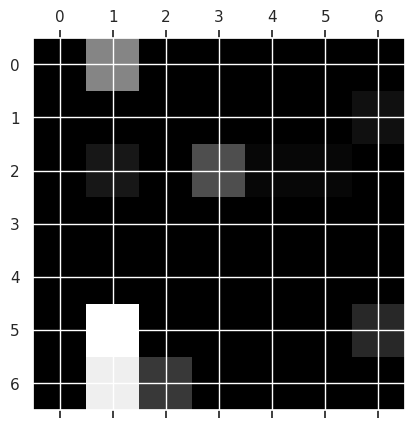

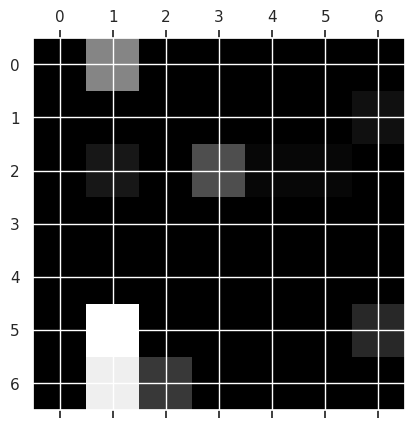

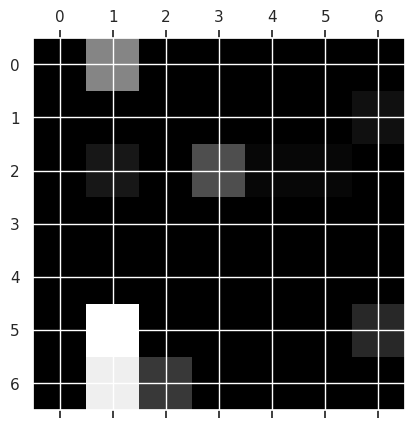

In [83]:
from sklearn.metrics import confusion_matrix
def plot_conf(y_test, y_pred):
    conf = confusion_matrix(y_test, y_pred_sgd)
    plt.matshow(conf, cmap = plt.cm.gray)
    plt.show()

def Plot_cof_norm(y_test, y_pred):
    conf_mx = confusion_matrix(y_test, y_pred_sgd)
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    # Fill diagonals with 0 for only error viz
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
    plt.show()
Plot_cof_norm(y_test, y_pred_sgd)
Plot_cof_norm(y_test, y_pred_ovo)
Plot_cof_norm(y_test, y_pred_forest)

In [84]:
# 0 Insufficient_Weight
# 1 Normal_Weight
# 2 Obesity_Type_I
# 3 Obesity_Type_II
# 4 Obesity_Type_III
# 5 Overweight_Level_I   
# 6 Overweight_Level_II  

"""5, 6, 0 are getting predicted as 1 as error
"""

'5, 6, 0 are getting predicted as 1 as error\n'

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
y_score0 = cross_val_score(sgd_clf, X_test_scaled, y_test, cv=3, scoring="accuracy")
y_score1 = cross_val_score(ovo_clf, X_test_scaled, y_test, cv=3, scoring="accuracy")
y_score2 = cross_val_score(forect_clf, X_test_scaled, y_test, cv=3, scoring="accuracy")

In [104]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_pred_sgd, average='micro'))
print(recall_score(y_test, y_pred_sgd, average='micro'))

0.6509433962264151
0.6509433962264151


In [105]:
print(precision_score(y_test, y_pred_ovo, average='micro'))
print(recall_score(y_test, y_pred_ovo, average='micro'))

0.6792452830188679
0.6792452830188679


In [106]:
print(precision_score(y_test, y_pred_forest, average='micro'))
print(recall_score(y_test, y_pred_forest, average='micro'))

0.9716981132075472
0.9716981132075472
